Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**Prelim Examination** |
**Name** | Abad, Julia Marie Iberet, Cortez, Angelica
**Section** | CPE32S3
**Date Performed**: | March 1, 2024
**Date Submitted**: | March 6, 2024
**Instructor**: | Engr. Roman Richard



# OBJECTIVES

Choose any dataset applicable for classification and/or prediction analysis problems.
Show the application of the following algorithms: <br>
- Linear Regression<br>
- Singular LR<br>
- Multiple LR<br>
- Polynomial LR<br>
- Logistic Regression<br>
- Decision Tree<br>
- Random Forest <br>
- Provide Evaluation reports for all models<br>

# ABOUT DATASET

Description:









> The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:



> Hours Studied: The total number of hours spent studying by each student.



> Previous Scores: The scores obtained by students in previous tests.



> Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).



> Sleep Hours: The average number of hours of sleep the student had per day.



> Sample Question Papers Practiced: The number of sample question papers the student practiced.



Target Variable:

> Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.



> The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

# DATA INFORMATION

In [ ]:
#IMPORT LIBRARIES AND DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_perf = pd.read_csv("/content/Student_Performance.csv")

In [ ]:
student_perf = student_perf.iloc[:1000]
print(student_perf)

     Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                7               99                        Yes            9   
1                4               82                         No            4   
2                8               51                        Yes            7   
3                5               52                        Yes            5   
4                7               75                         No            8   
..             ...              ...                        ...          ...   
995              8               66                         No            5   
996              1               56                         No            4   
997              9               72                         No            9   
998              7               70                        Yes            9   
999              3               89                        Yes            9   

     Sample Question Papers Practiced  Performance 

In [ ]:
#Summary of information about the data frame
student_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     1000 non-null   int64  
 1   Previous Scores                   1000 non-null   int64  
 2   Extracurricular Activities        1000 non-null   object 
 3   Sleep Hours                       1000 non-null   int64  
 4   Sample Question Papers Practiced  1000 non-null   int64  
 5   Performance Index                 1000 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


In [ ]:
# Show content of the dataframe
student_perf.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [ ]:
student_perf.tail(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
990,1,99,Yes,5,0,75.0
991,7,49,No,9,1,40.0
992,7,64,Yes,6,7,59.0
993,2,70,Yes,7,9,49.0
994,7,60,Yes,9,3,48.0
995,8,66,No,5,2,60.0
996,1,56,No,4,1,29.0
997,9,72,No,9,5,68.0
998,7,70,Yes,9,3,63.0
999,3,89,Yes,9,2,71.0


In [ ]:
# Contents of data types for each column

student_perf.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [ ]:
# Show descriptive statistics of the data within the data frame
student_perf.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.898000,69.939000,6.51600,4.484000,55.408000
std,2.603916,17.339953,1.69783,2.811343,19.476984
min,1.000000,40.000000,4.00000,0.000000,10.000000
25%,3.000000,55.000000,5.00000,2.000000,40.750000
50%,5.000000,70.000000,7.00000,5.000000,56.000000
75%,7.000000,85.250000,8.00000,7.000000,71.000000
max,9.000000,99.000000,9.00000,9.000000,100.000000


In [ ]:
# Data Cleaning

student_perf.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
# Replacing string data with numeric label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label = le.fit_transform(student_perf['Extracurricular Activities'])
label

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
#Dropping and adding column
#Removes the "Extracurricular Activities" column from the data frame
student_perf.drop("Extracurricular Activities", axis=1, inplace=True)
#Assigns the values of "label" variable into a new column named "Extracurricular Activities"
student_perf["Extracurricular Activities"] = label

student_perf

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
995,8,66,5,2,60.0,0
996,1,56,4,1,29.0,0
997,9,72,9,5,68.0,0
998,7,70,9,3,63.0,1


In [ ]:
# Define a function to classify pass or fail based on student's performance index
def classify_performance(performance_index):
    if performance_index >= 60:
        return 'Pass'
    else:
        return 'Fail'

student_perf["Pass/Fail"] = student_perf["Performance Index"].apply(classify_performance)

student_perf.head()
#If the index is greater or equal to 60, it will return pass, otherwise fail. The function will based on the performance index column of the data frame.

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities,Pass/Fail
0,7,99,9,1,91.0,1,Pass
1,4,82,4,2,65.0,0,Pass
2,8,51,7,2,45.0,1,Fail
3,5,52,5,2,36.0,1,Fail
4,7,75,8,5,66.0,0,Pass


In [ ]:
#Shows the last few rows of the data frame
student_perf.tail()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities,Pass/Fail
995,8,66,5,2,60.0,0,Pass
996,1,56,4,1,29.0,0,Fail
997,9,72,9,5,68.0,0,Pass
998,7,70,9,3,63.0,1,Pass
999,3,89,9,2,71.0,1,Pass


#Linear Regression

##Singular Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Target/Dependent Variable
y_target = student_perf["Performance Index"].values
# Independent Variables
columns = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
X_input = student_perf[list(columns)].values

#Data are split into training and testing sets
X_input, X_test, y_target, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)

#Creating and fitting the linear regression
model = LinearRegression()
model.fit(X_input, y_target)

#Target variable prediction using test data
y_predict = model.predict(X_test)

#calculation of mse between the predicted and actual values
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)

Mean Squared Error: 59.20351699968257
Coefficients: [ 1.02267355 -0.27523429  0.37246408  0.17362267]


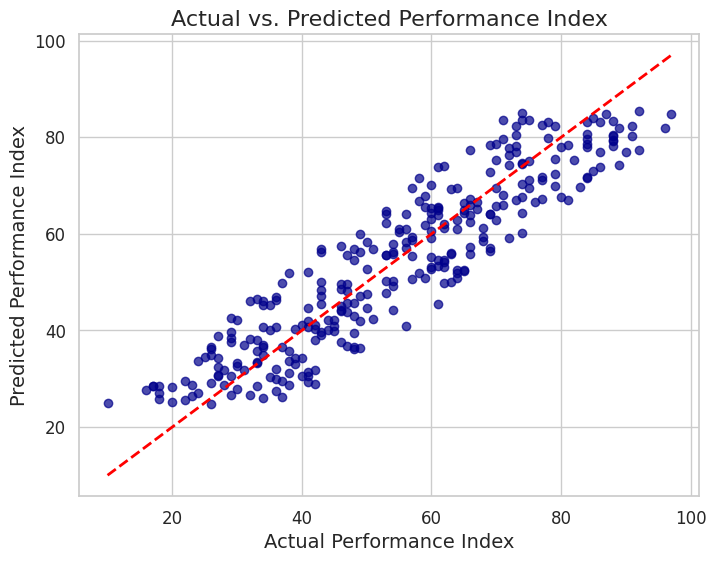

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#creating scatter plot between the predicted and actual performance index
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='darkblue', alpha=0.7)

#customizing titles and labels for the plotting table
plt.title('Actual vs. Predicted Performance Index', fontsize=16)
plt.xlabel('Actual Performance Index', fontsize=14)
plt.ylabel('Predicted Performance Index', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Adding a diagonal line to represent the most accurate or perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.show()

**EVALUATION REPORT:** <br>
This script of code demonstrates a single linear regression model for predicting student performance based on various independent variables such as previous scores, extracurricular activities, sleep hours, and sample question papers practiced. We first started by importing the necessary libraries, including pandas for data manipulation, sklearn for machine learning functionalities, matplotlib for plotting, and seaborn for enhancing the visualization. The data is split into training and testing sets using sklearn's train_test_split function, and a linear regression model is created and fitted using the training data. The model then predicts the target variable using the testing set, and the mean squared error between the predicted and actual values is calculated. Coefficients of the linear regression model are printed, and a scatter plot is generated to visualize the relationship between actual and predicted performance indices, with a diagonal line representing perfect prediction. <br>
<br>

The output includes the mean squared error and coefficients of the linear regression model. Additionally, a scatter plot is shown, illustrating the relationship between the actual and predicted performance indices. The diagonal line represents perfect prediction, and the closer the scatter points are to this line, the better the model's predictions.

##Multiple Linear Regression

In [ ]:
#Independent Variables
X = student_perf[['Previous Scores', 'Sleep Hours',]]
#Dependent Variable
y = student_perf['Performance Index']

#Splitting data to  training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

#creating and fitting linear regression
Multi_lr = LinearRegression()
Multi_lr.fit(X_input,y_target)

LinearRegression()

Mean Squared Error: 4.0902038884719705


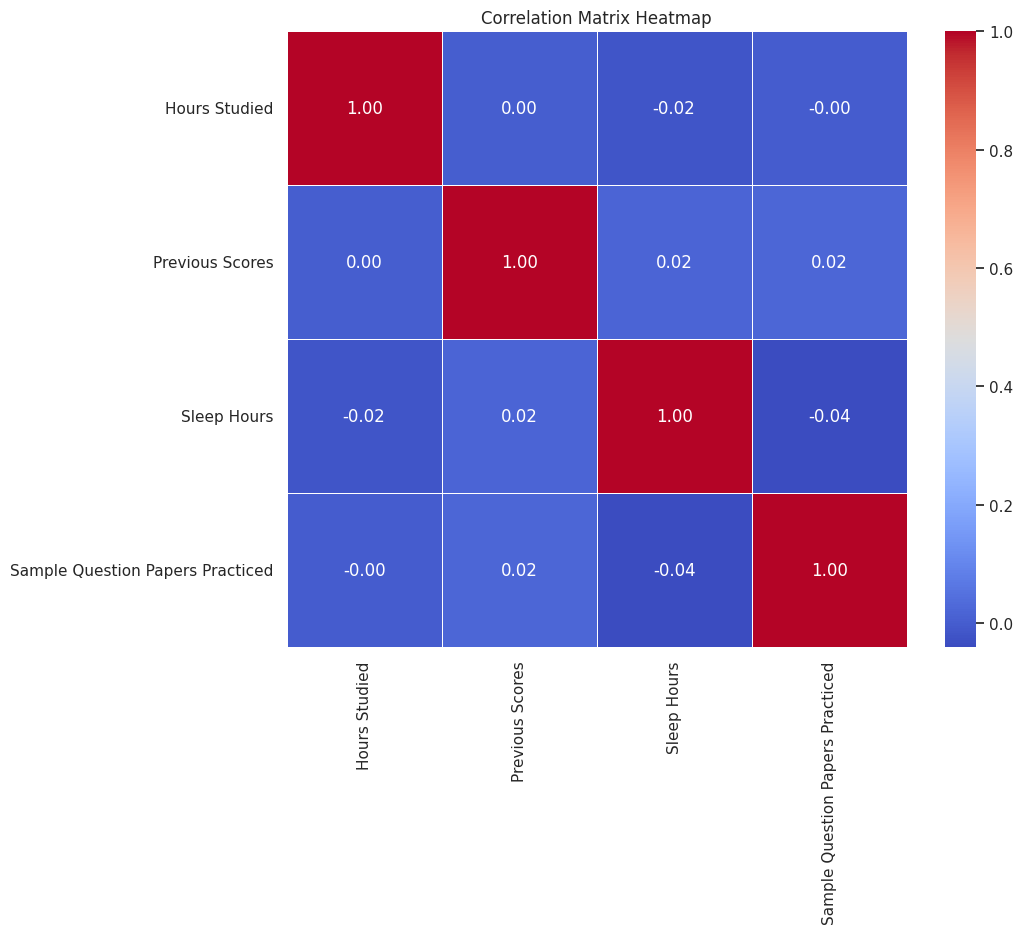

Coefficients:
                                  Coefficient
Hours Studied                        2.836241
Previous Scores                      1.021720
Sleep Hours                          0.453353
Sample Question Papers Practiced     0.183883


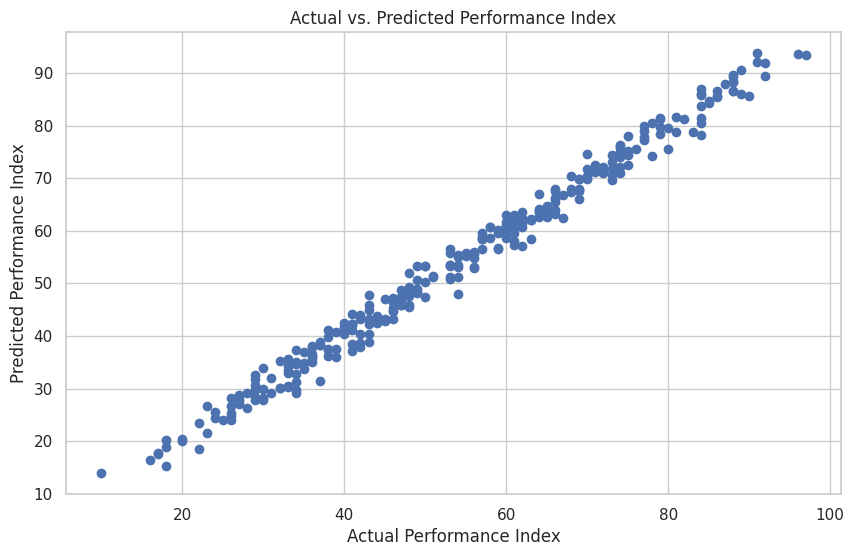

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Target/Dependent Variable
y_target = student_perf["Performance Index"].values
# Independent Variables
columns = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
X_input = student_perf[columns].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)

# Creating and fitting linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting target variable using the test data
y_predict = model.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

# Creating correlation matrix data frame from the training data
corr_matrix = pd.DataFrame(X_train, columns=columns).corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Displaying coefficients
coefficients = pd.DataFrame(model.coef_, columns=['Coefficient'], index=columns)
print("Coefficients:")
print(coefficients)

# Visualizing predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.show()

**EVALUATION REPORT:** <br>

This code is a Python script that performs multiple linear regression modeling and visualization of the data. It defines independent and dependent variables from the dataset, splits the data into training and testing sets from the dataset with additional columns included, and creates and fits a linear regression model using the training data. The model predicts the target variable using the test data, calculates the mean squared error between predicted and actual values, and displays coefficients. It also generates a correlation heatmap to visualize relationships between independent variables. Finally, it plots a scatter plot to show the relationship between actual and predicted performance indices.
<br> <br>
The output includes the mean squared error between the predicted and actual performance indices, providing insight into the accuracy of the linear regression model. A correlation heatmap showing the relationships between independent variables. The coefficients of the linear regression model, indicating the weights assigned to each independent variable. And a scatter plot illustrating the relationship between actual and predicted performance indices.

##Polynomial LR


In [ ]:
#Selecting independent variables for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = student_perf[['Previous Scores', 'Sleep Hours']]
y = student_perf['Performance Index']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Split degree of polynomial features
degree = 2

#Generate polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

#creating and fitting polynomial regression
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)


LinearRegression()

.

Mean Squared Error: 59.20351699968257
Coefficients: [ 1.02267355 -0.27523429  0.37246408  0.17362267]


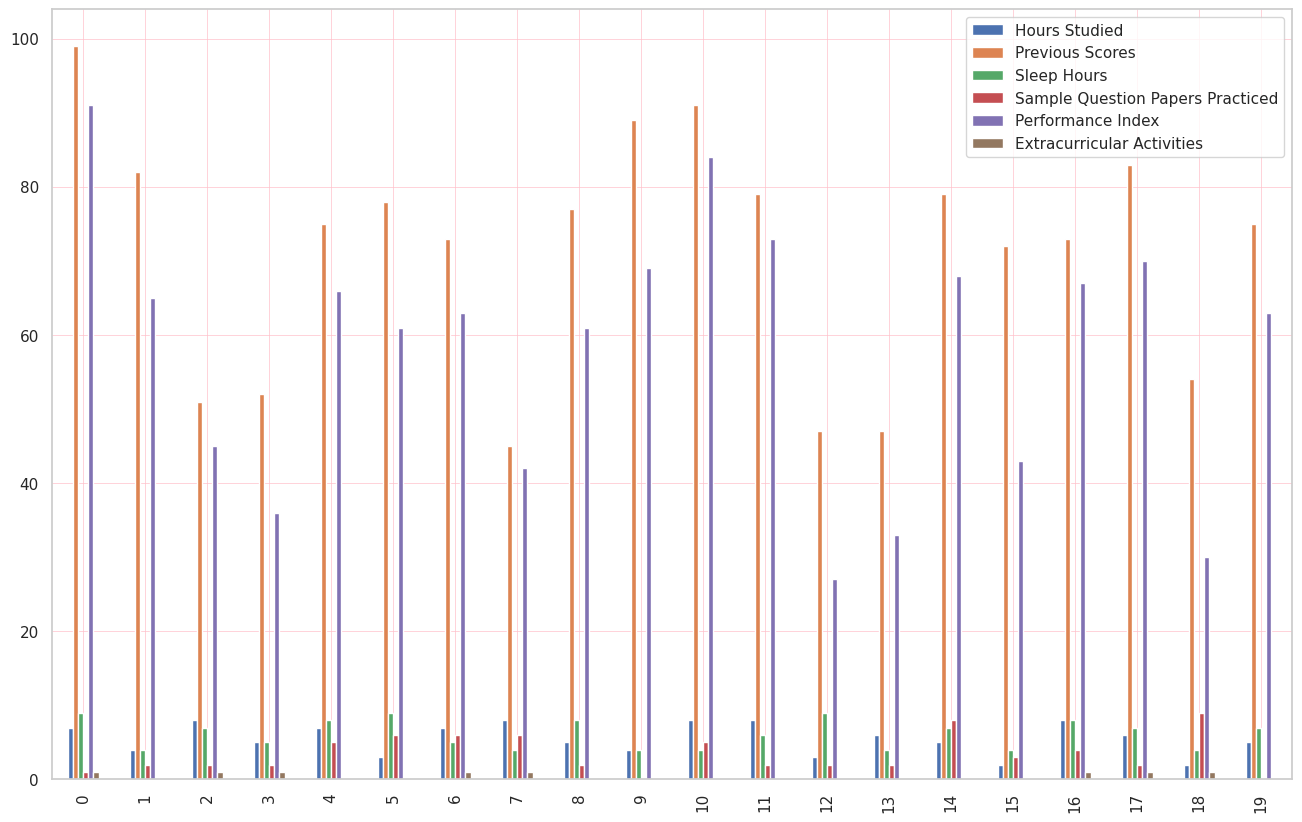

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Target/Dependent Variable
y_target = student_perf["Performance Index"].values
columns = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
#Independent Variable
X_input = student_perf[columns].values

#splitting data into training and testing sets
X_input, X_test, y_target, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)

#Model fitting
model = LinearRegression()
model.fit(X_input, y_target)

#Predictions
y_predict = model.predict(X_test)

#calculating Mean Squared Error
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

# Coefficients
print("Coefficients:", model.coef_)

data1= student_perf.head(20)
data1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='pink')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

**Evaluation Report** <BR>
This Python script performs polynomial regression modeling and visualization tasks. It selects "Previous Scores" and "Sleep Hours" as independent variables and "Performance Index" as the dependent variable from the dataset. The data are split into training and testing sets, and polynomial features are generated up to the second degree. Two linear regression models are created and fitted: one using polynomial features and the other using the original independent variables. Predictions are made using the test data, and mean squared error is calculated for both models. The script also prints the coefficients of the linear regression model for the original independent variables. Additionally, a bar plot is generated to visualize the first 20 rows of the dataset.

<BR> <BR> The output includes the mean squared error between the predicted and actual performance indices for both the polynomial regression model and coefficients of the linear regression models, as well as the bar plot displaying the dataset.

##Logistic Regression

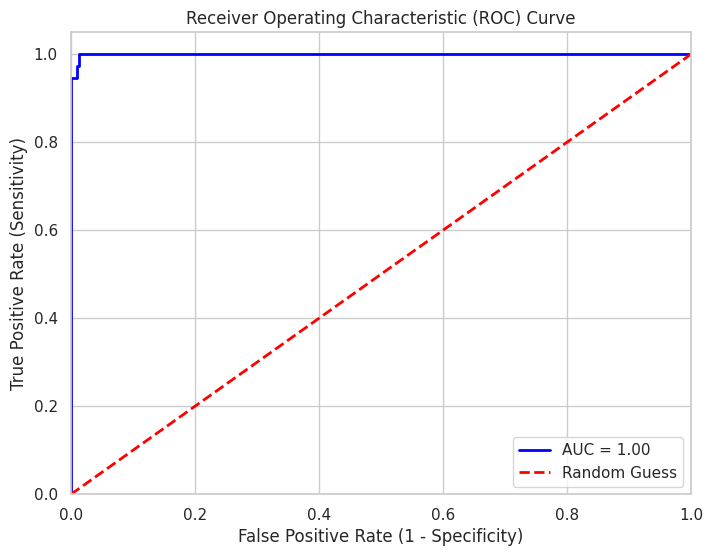

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset and preprocess if necessary
# Assuming your dataset is stored in a DataFrame called student_perf

# Convert the 'Extracurricular Activities' column to binary (0 or 1)
student_perf['Extracurricular Activities'] = LabelEncoder().fit_transform(student_perf['Extracurricular Activities'])

# Define predictor variables (independent variables) and target variable (dependent variable)
X = student_perf[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = student_perf['Performance Index'] >= 70  # Convert to binary class (1 if Performance Index >= 70, else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

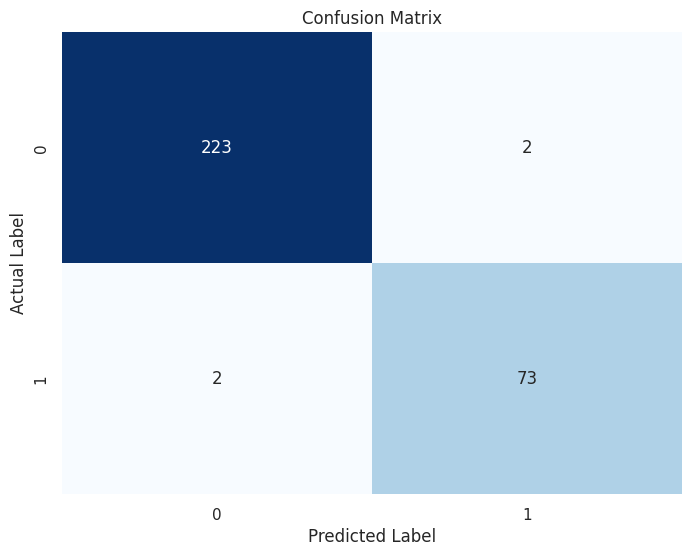

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load the dataset and preprocess if necessary
# Assuming your dataset is stored in a DataFrame called student_perf

# Convert the 'Extracurricular Activities' column to binary (0 or 1)
student_perf['Extracurricular Activities'] = LabelEncoder().fit_transform(student_perf['Extracurricular Activities'])

# Define predictor variables (independent variables) and target variable (dependent variable)
X = student_perf[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = student_perf['Performance Index'] >= 70  # Convert to binary class (1 if Performance Index >= 70, else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset and preprocess if necessary
# Assuming your dataset is stored in a DataFrame called student_perf

# Convert the 'Extracurricular Activities' column to binary (0 or 1)
student_perf['Extracurricular Activities'] = LabelEncoder().fit_transform(student_perf['Extracurricular Activities'])

# Define predictor variables (independent variables) and target variable (dependent variable)
X = student_perf[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = student_perf['Performance Index'] >= 70  # Convert to binary class (1 if Performance Index >= 70, else 0)

# Convert the binary target variable to strings
y = y.replace({True: 'Yes', False: 'No'})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          No       0.99      0.99      0.99       225
         Yes       0.97      0.97      0.97        75

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



**EVALUATION REPORT** <BR>

This Python script performs logistic regression modeling and evaluation tasks for predicting whether students will achieve a performance index of 70 or above. It preprocesses the data by converting the 'Extracurricular Activities' column into binary values. Then, it defines the predictor variables and the target variable, splitting the dataset into training and testing sets. The script trains logistic regression models on the training data and evaluates their performance. It computes the ROC curve and AUC score for the first model, generates a confusion matrix heatmap, and produces a classification report, summarizing precision, recall, F1-score, and support for each class.
<BR>
The outputs provide insights into the model's performance in predicting whether students will achieve a performance index of 70 or above.

##Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Target/Dependent Variable
y_target = student_perf["Performance Index"].values
columns = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
#Independent Variable
X_input = student_perf[columns].values

#splitting testing-training sets
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)

#creating and fitting decision tree model
model = DecisionTreeRegressor(random_state=47)
model.fit(X_train, y_train)

#Predicting target variable using test data
y_pred = model.predict(X_test)

In [ ]:
# Build the model using Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#creating decision tree classifier instance
student_clf = DecisionTreeClassifier()

#fitting classifier to the data
student_clf.fit(X_input, y_target)

DecisionTreeClassifier()

In [ ]:
#Evaluate the accuracy of the trained decision tree classifier on the training data and corresponding target labels.
#Accuracy score: 0 = worst, 1 = best
student_clf.score(X_input,y_target)

0.935

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

y_target = student_perf["Performance Index"].values
columns = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
#Independent Variable
X_input = student_perf[columns].values

#splitting testing-training sets
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)

#creating and fitting decision tree model
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

#Predicting target variable using test data
y_pred = model.predict(X_test)

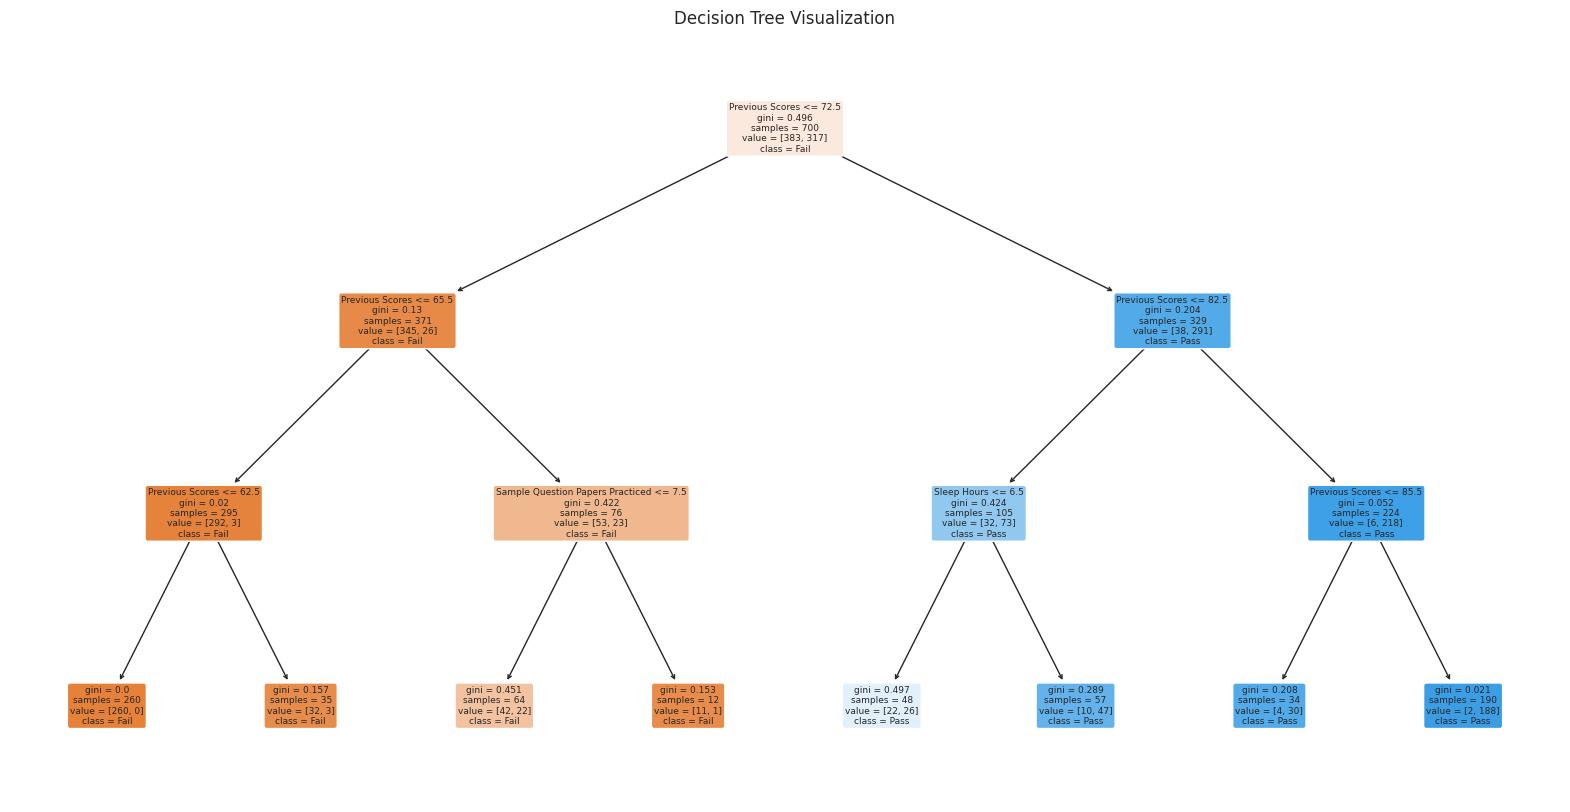

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define a function to classify pass or fail based on student's performance index
def classify_performance(performance_index):
    if performance_index >= 60:
        return 'Pass'
    else:
        return 'Fail'

# Adding Pass/Fail label to the dataset
student_perf["Pass/Fail"] = student_perf["Performance Index"].apply(classify_performance)

# Independent Variables
columns = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
X_input = student_perf[list(columns)].values
# Target Variable
y_target = student_perf["Pass/Fail"].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)

# Creating and fitting the decision tree classifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=columns, class_names=model.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

**EVALUATION REPORT** <BR>

This Python script employs decision tree models for predicting student performance and visualizing decision trees. Initially, it splits the data into training and testing sets, then creates and trains a decision tree regression model to predict the student performance index, computing mean squared error for evaluation. Visualizations of decision trees are generated using the plot_tree function, illustrating the decision-making process and structure of the models.
<BR> <BR>
The output includes the mean squared error for the regression model and the accuracy score for the classification model as part of its evaluation. Visualizations of decision trees for both regression and classification tasks, showcasing the decision-making process and structure of the models.

##Random Forest

In [ ]:
#Import required libaries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Performing one-hot encoding on the 'Extracurricular Activities' column
full_df_encoded = pd.get_dummies(student_perf, columns=['Extracurricular Activities'])

#One-hot encoding converts categorical variables into binary features.
#Each unique category in the column becomes a new binary feature column, indicating the presence or absence of that category.
#The resulting DataFrame 'full_df_encoded' now includes the original columns along with the newly created binary feature columns.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Extract target variable and feature columns
y_target = student_perf["Performance Index"].values
columns = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
X_input = student_perf[columns].values

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)
#Train a random forest classifier
rf_classifier = RandomForestClassifier(random_state=47)
rf_classifier.fit(X_train, y_train)

#Predict the target variable for the testing data
y_pred = rf_classifier.predict(X_test)

#Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.03333333333333333


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define a function to classify pass or fail based on student's performance index
def classify_performance(performance_index):
    if performance_index >= 60:
        return 'Pass'
    else:
        return 'Fail'

# Add Pass/Fail label to the dataset
student_perf["Pass/Fail"] = student_perf["Performance Index"].apply(classify_performance)

# Independent Variables
columns = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
X_input = student_perf[list(columns)].values

# Target/Dependent Variable
y_target = student_perf["Performance Index"].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)

# Creating and fitting the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=47)
model.fit(X_train, y_train)

# Target variable prediction using test data
y_predict = model.predict(X_test)

# Calculation of MSE between the predicted and actual values
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

# No need to print coefficients for Random Forest


Mean Squared Error: 73.90402524774233


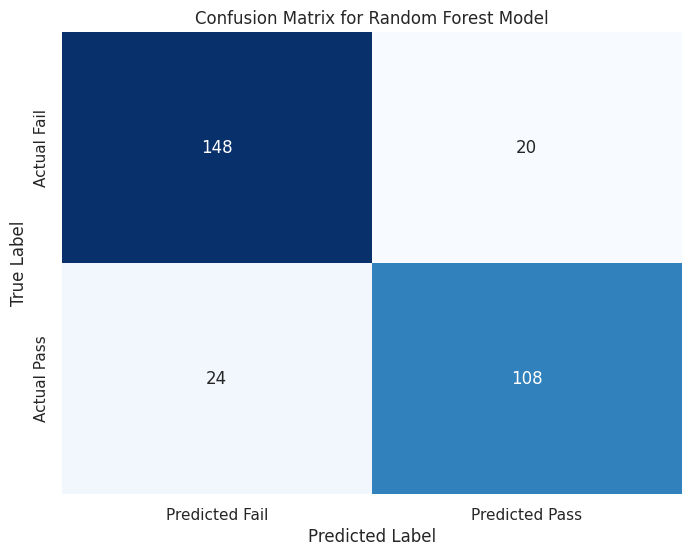

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to classify pass or fail based on student's performance index
def classify_performance(performance_index):
    if performance_index >= 60:
        return 'Pass'
    else:
        return 'Fail'

# Add Pass/Fail label to the dataset
student_perf["Pass/Fail"] = student_perf["Performance Index"].apply(classify_performance)

# Independent Variables
columns = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
X_input = student_perf[list(columns)].values

# Target/Dependent Variable
y_target = student_perf["Pass/Fail"].values

# Data are split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)

# Creating and fitting the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=47)
model.fit(X_train, y_train)

# Predicting the classes on the test data
y_pred = model.predict(X_test)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


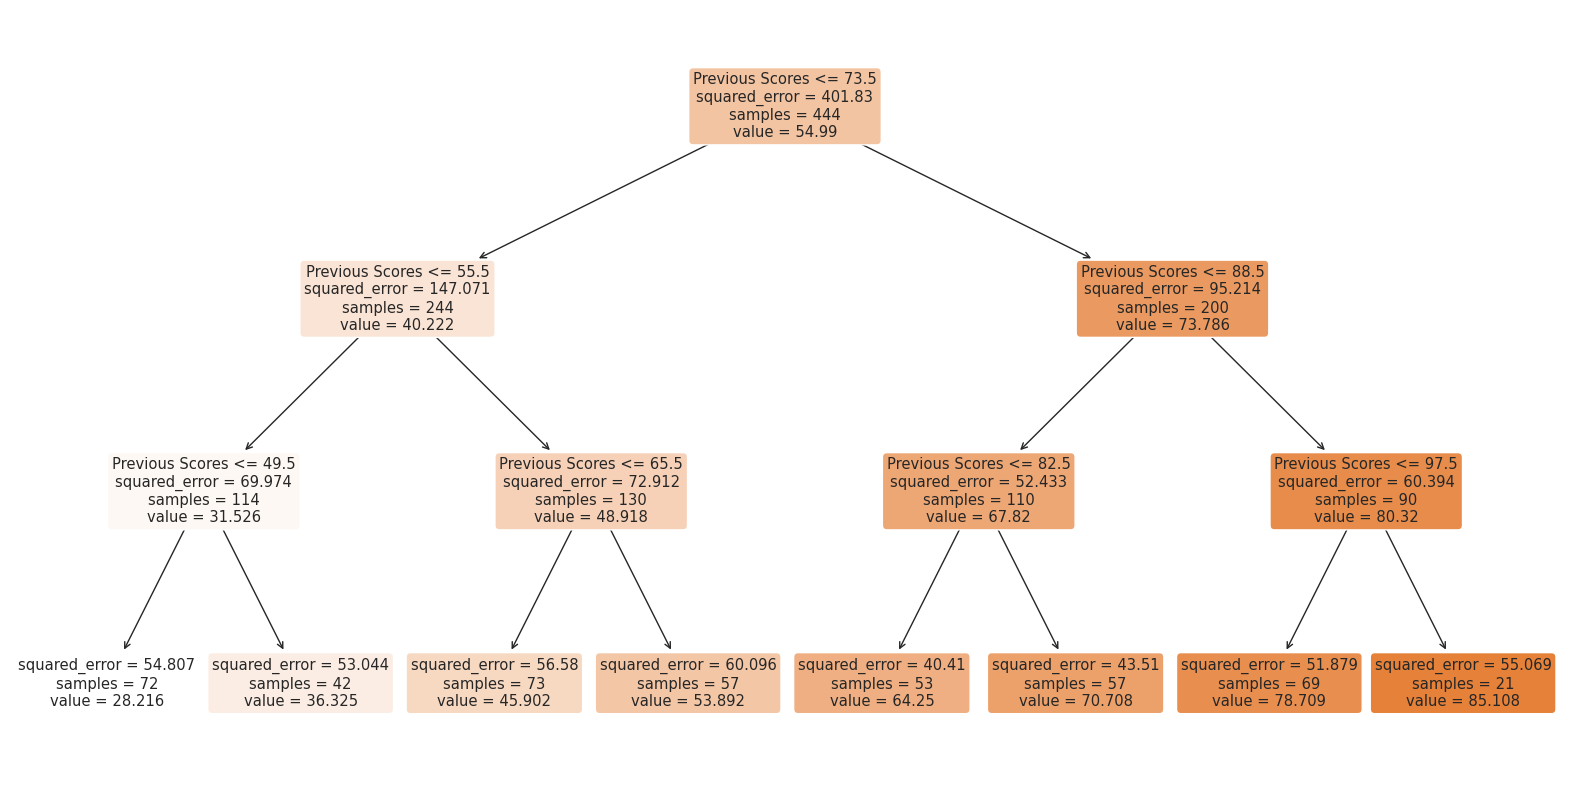

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the target variable and independent variables
y_target = student_perf["Performance Index"].values
columns = ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
X_input = student_perf[columns].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.3, random_state=47)

# Create and fit the Random Forest Regressor model
model = RandomForestRegressor(max_depth=3, random_state=47)
model.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = model.predict(X_test)

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=columns, filled=True, rounded=True)
plt.show()


**EVALUATION REPORT:** <BR>
This Python script demonstrates the usage of Random Forest models for both classification and regression tasks on student performance data. Firstly, it imports the required libraries for data manipulation, model training, and performance evaluation. Then, it performs one-hot encoding on the 'Extracurricular Activities' column to convert categorical variables into binary features. Next, it splits the dataset into training and testing sets. For classification, it trains a Random Forest classifier to predict whether students pass or fail based on their performance index, and evaluates the model's accuracy. For regression, it defines a function to classify pass or fail based on the performance index, adds a Pass or Fail label to the dataset, and trains a Random Forest regression to predict the performance index. The script also calculates the mean squared error (MSE) between the predicted and actual values. Finally, it creates a confusion matrix for the classification model to visualize its performance. The output include the accuracy score for the classification model, the MSE for the regression model, and a confusion matrix visualization for the classification model.

# CONCLUSION/OBSERVATION/ANALYSIS

In analyzing the dataset we chose which is the student performance data, we employed a variety of machine learning techniques to predict performance scores and classify pass/fail outcomes. Linear regression was utilized initially to model the relationship between independent variables such as previous scores, extracurricular activities, sleep hours, and sample question papers practiced, and the dependent variable, performance index. We evaluated the performance of this model using mean squared error (MSE) as a measure of prediction accuracy. Polynomial regression was subsequently employed to capture potential nonlinear relationships in the data, offering increased flexibility in modeling complex interactions between variables. Logistic regression was then applied for binary classification tasks, distinguishing between students who passed or failed based on their performance index. Accuracy and confusion matrices provided insights into the model's classification performance, aiding in evaluating its effectiveness.

In addition to regression and classification techniques, decision trees and random forests were employed to further analyze student performance data. Decision trees were visualized to understand the decision-making process behind predicting performance scores and pass/fail outcomes. Random forests, which aggregate predictions from multiple decision trees, were employed to improve prediction accuracy and generalize better to unseen data. Evaluation metrics such as mean squared error for regression tasks and accuracy scores and confusion matrices for classification tasks provided valuable insights into the performance of these models. Overall, this diverse set of machine learning techniques offers versatile approaches for analyzing and predicting student performance, providing valuable insights for educational institutions and stakeholders.